# Importing Libraries

In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# Reading the apple stock data

**We will be using apple stock data for our stock prediction purpose**

In [2]:
file='gs.us.txt'
data=pd.read_csv(file,sep=',')
data.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0


**Parsing the date into appropriate format and making it as index column**

In [3]:
dateparse=lambda date:pd.datetime.strptime(date,'%Y-%m-%d')
data=pd.read_csv(file,sep=',',index_col='Date',date_parser=dateparse)
data.head(5)


,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1999-05-05,62.213,62.213,58.991,61.547,8295140,0
1999-05-06,60.542,61.773,59.712,60.488,3185852,0
1999-05-07,60.488,66.671,59.429,65.998,5331091,0
1999-05-10,65.331,65.441,62.549,62.941,2839054,0


# Plotting

**This is OPEN price for apple stock**

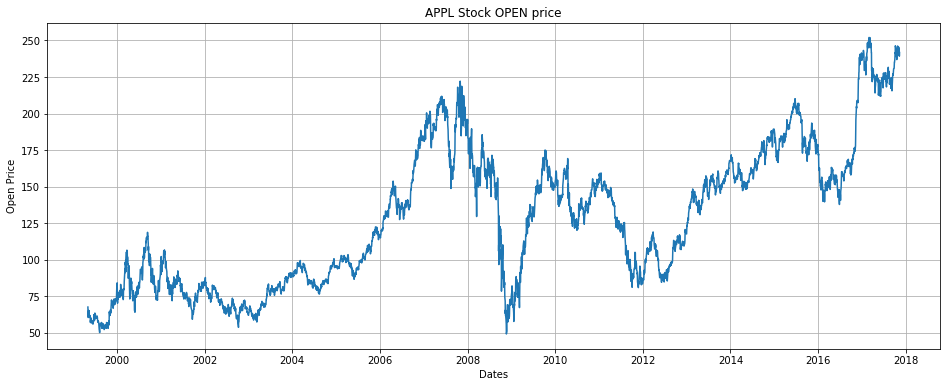

In [4]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Price')
plt.title('APPL Stock OPEN price')
plt.plot(data['Open'])
plt.show()

**This is CLOSE price for apple stock**

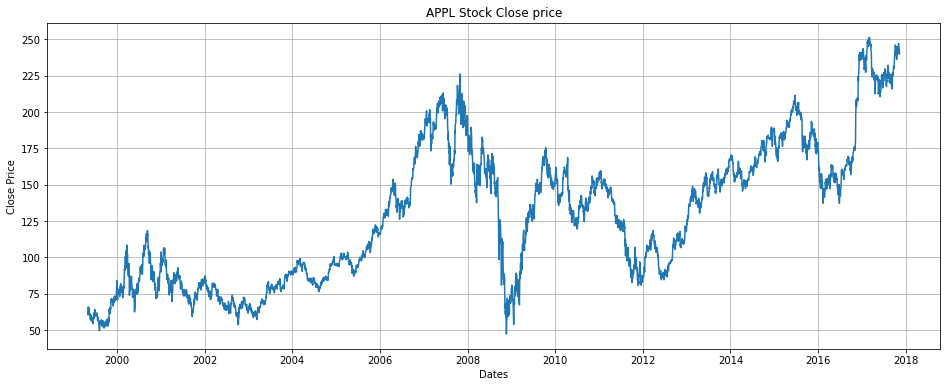

In [5]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.title('APPL Stock Close price')
plt.plot(data['Close'])
plt.show()

### Observations:-
**As we can see there is not so much of difference in open and close price.**

# Selecting start and end date

**We will select date range from 1999 to 2005**

In [14]:

start_date = '1999-05-04'
end_date = '2002-12-31'
weekday=pd.date_range(start=start_date,end=end_date,freq='B')
new_data=data.reindex(weekday)
new_data=new_data.fillna(method='ffill')

**Checking if NaN value exists**

In [15]:
new_data.isna().any()

Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
dtype: bool

In [16]:
new_data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,956.000000,956.000000,956.000000,956.000000,9.560000e+02,956.0
mean,76.136089,77.628834,74.714344,76.184924,2.990206e+06,0.0
std,13.321268,13.791868,12.989830,13.433659,2.822590e+06,0.0
min,50.191000,51.031000,49.242000,49.698000,1.179760e+05,0.0
25%,66.806000,67.853000,65.445500,66.740000,1.430082e+06,0.0
50%,75.305500,76.672500,73.676000,75.094000,2.599433e+06,0.0
75%,83.254750,84.642250,81.813500,83.473750,3.829994e+06,0.0
max,118.760000,119.900000,116.390000,118.470000,6.050659e+07,0.0


# Simple rolling moving average

### We are going to use simple moving average and plot the results

$$ SMA=(A1+A2+...+An)/n$$
**where:**<br>
**A=average in period n**<br>
**n=number of time periods**<br><br><br>
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random short-term price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

RMSE Rolling 20 :     5.066937868217815
RMSE Rolling 100 :     5.23267150078846


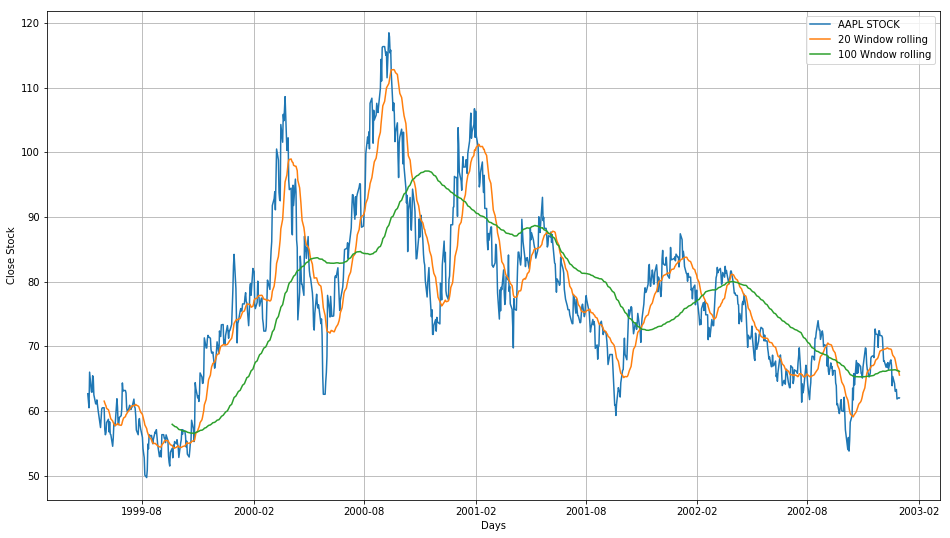

In [34]:

close=new_data['Close']
rolling_20=close.rolling(window=20).mean()
rolling_100=close.rolling(window=100).mean()



fig,ax=plt.subplots(figsize=(16,9))
ax.grid(True)
ax.set_xlabel('Days')
ax.set_ylabel('Close Stock')
ax.plot(close,label='AAPL STOCK')
ax.plot(rolling_20,label='20 Window rolling')
ax.plot(rolling_100,label='100 Wndow rolling')
ax.legend()
print("RMSE Rolling 20 :     "+str(np.math.sqrt(mse(close[21:], rolling_20[21:]))))
print("RMSE Rolling 100 :     "+str(np.math.sqrt(mse(close[101:], rolling_20[101:]))))

# Trading Strategy

RMSE Rolling 30 :     6.440061747266443


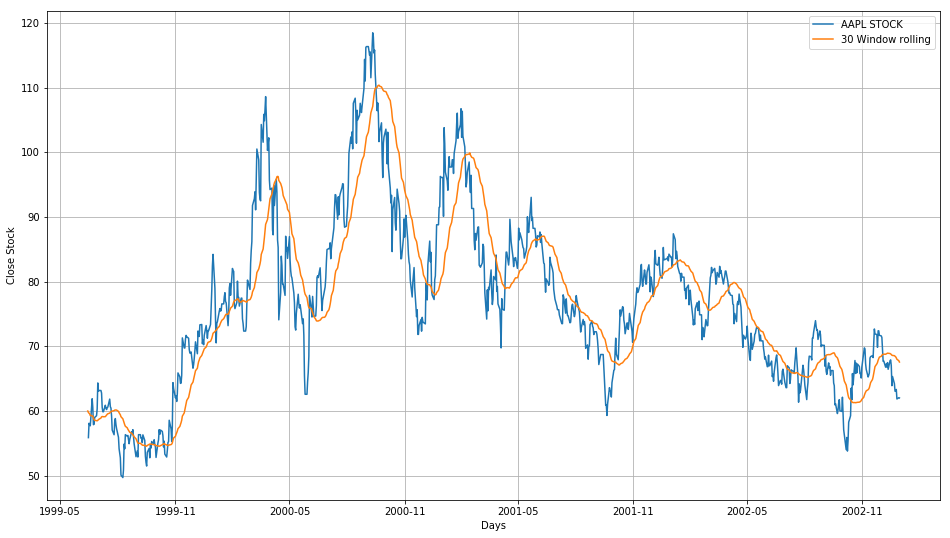

In [187]:

close=new_data['Close']
rolling_20=close.rolling(window=30).mean()

fig,ax=plt.subplots(figsize=(16,9))
ax.grid(True)
ax.set_xlabel('Days')
ax.set_ylabel('Close Stock')
ax.plot(close[30:],label='AAPL STOCK')
ax.plot(rolling_20,label='30 Window rolling')

ax.legend()
print("RMSE Rolling 30 :     "+str(np.math.sqrt(mse(close[30:], rolling_20[30:]))))


In [150]:
trade_price=close[30:]-rolling_20[30:]
weight=0.7
trade=trade_price[30:].apply(np.sign)*weight

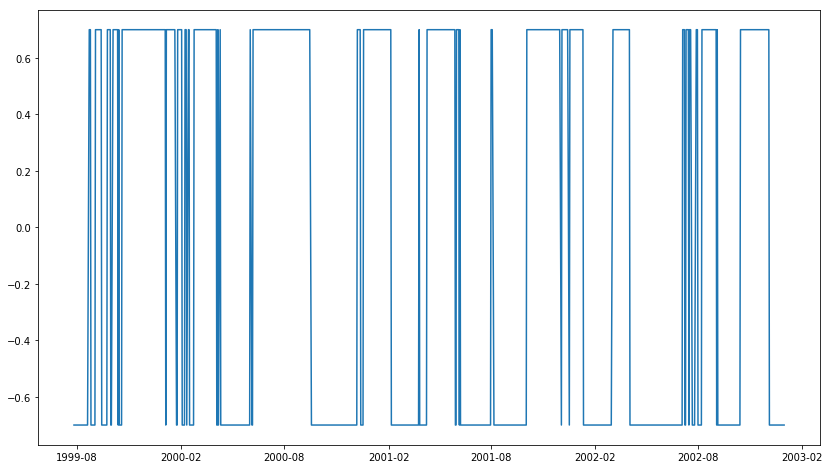

In [151]:
plt.plot(trade)

# Exponential Moving average

### Here we are using exponential moving average which is better than SMAE

**Moving averages also impart important trading signals on their own, or when two averages cross over. A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates that it is in a downtrend.**

RMSE Rolling 20 :     5.066937868217815
RMSE EMA  Rolling 20 :     4.374961828018931


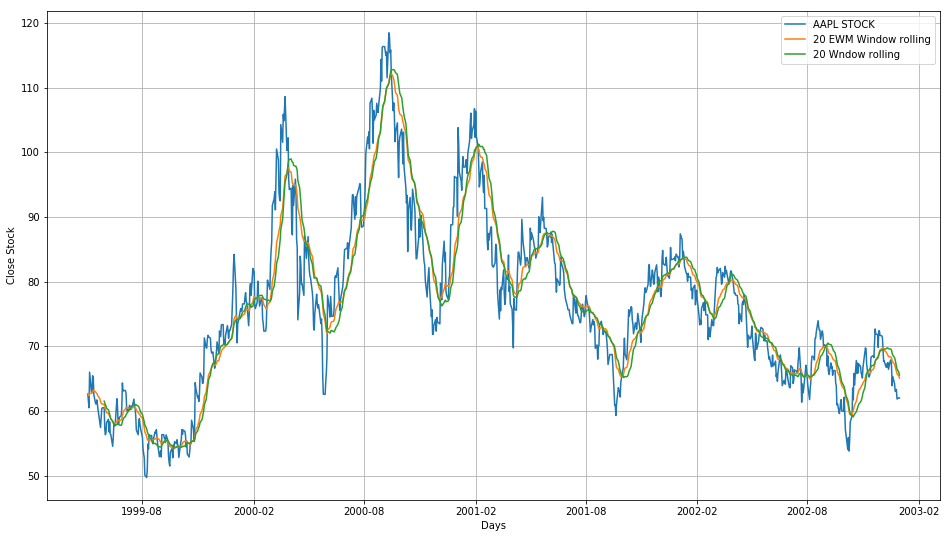

In [36]:

close=new_data['Close']
rolling_20_ewm=close.ewm(span=20,adjust=False).mean()
rolling_20=close.rolling(window=20).mean()
fig,ax=plt.subplots(figsize=(16,9))
ax.grid(True)
ax.set_xlabel('Days')
ax.set_ylabel('Close Stock')
ax.plot(close,label='AAPL STOCK')
ax.plot(rolling_20_ewm,label='20 EWM Window rolling')
ax.plot(rolling_20,label='20 Wndow rolling')
ax.legend(loc='best')
print("RMSE Rolling 20 :     "+str(np.math.sqrt(mse(close[21:], rolling_20[21:]))))
print("RMSE EMA  Rolling 20 :     "+str(np.math.sqrt(mse(close[21:], rolling_20_ewm[21:]))))

# Daily return i.e Close-Open

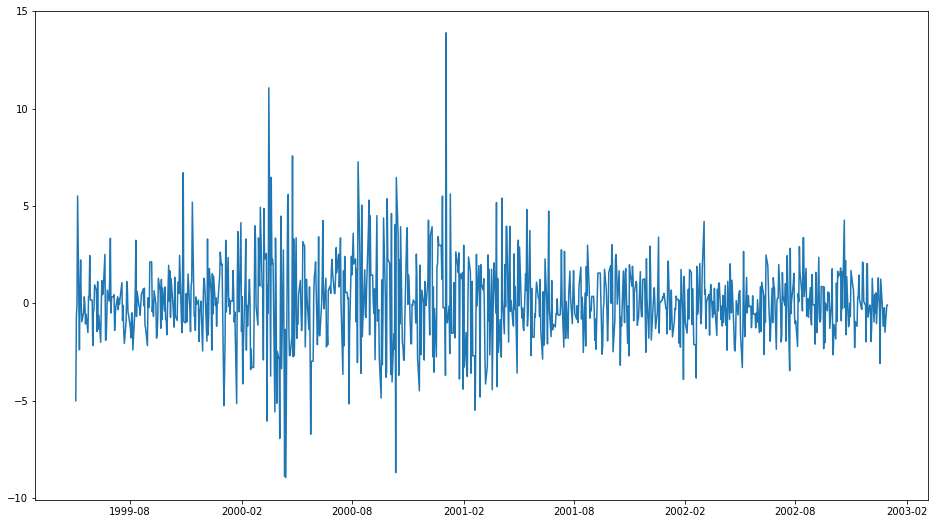

In [20]:

def daily_return(df):
    #df1=df.copy()
    df=df['Close']-df['Open']
    return df
return_data=daily_return(new_data)
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(return_data)

# Splitting into Train and Test

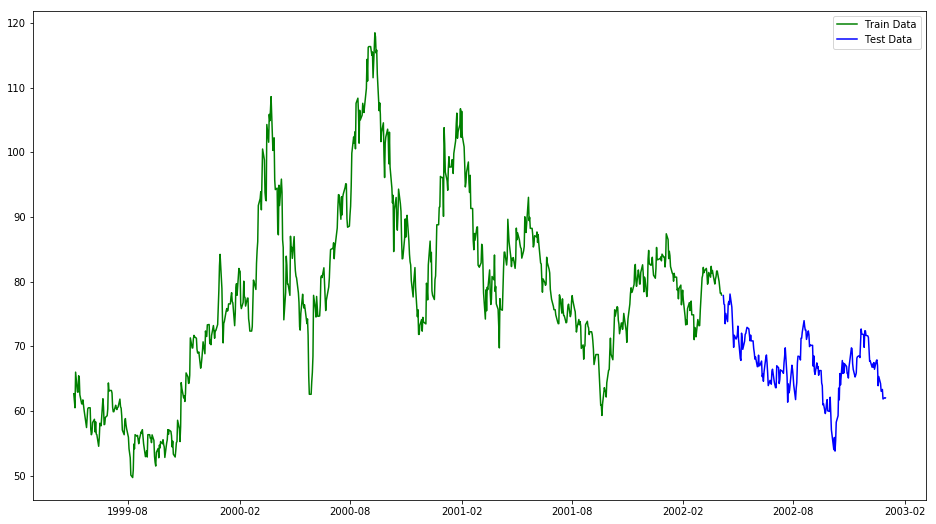

In [37]:

train_data,test_data=new_data['Close'][:int(0.8*len(new_data))],new_data['Close'][int(0.8*len(new_data)):]
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(train_data,'green',label='Train Data')
ax.plot(test_data,'blue',label='Test Data')
ax.legend()


**stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. The algebraic equivalent is thus a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows, but the way it changes remains constant — it has a constant slope; one value that captures that rate of change.**

**Lag:** For some specific time point r, the observation xᵣ₋ᵢ (i periods back) is called the i-th lag of xᵣ. A time series Y generated by back-shifting another time series X by i time steps is also sometime called the i-th lag of X, or an i-lag of X. This transformation is called both the backshifting operator, commonly denoted as B(∙),and the lag operator, commonly denoted as L(∙); thus, L(Xᵣ)=Xᵣ₋₁. Powers of the operators are defined as Lⁱ(Xᵣ)=Xᵣ₋ᵢ.

**Creating the dataset for further processing**

In [39]:
tmp_frame=pd.concat([train_data.shift(1),train_data],axis=1)
tmp_frame.columns=['t-1','t']
print(tmp_frame.corr())
tmp_frame.head(5)

          t-1         t
t-1  1.000000  0.984544
t    0.984544  1.000000


,t-1,t
1999-05-04,NaN,62.659
1999-05-05,62.659,61.547
1999-05-06,61.547,60.488
1999-05-07,60.488,65.998
1999-05-10,65.998,62.941


# Simple predictions using previous value as predicted value

Root  mean square error: 1.5917277627890183


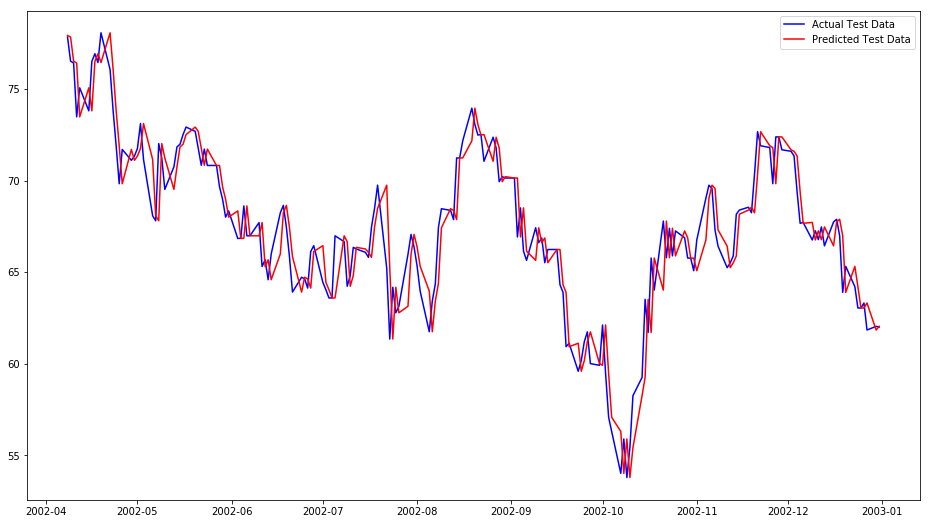

In [41]:

from sklearn.metrics import mean_squared_error as mse
tmp_data=pd.concat([close.shift(1),close],axis=1)
tmp_data.columns=['t-1','t']
#print(tmp_data.head(5))
train,test=tmp_data[1:int(0.8*len(tmp_data))],tmp_data[int(0.8*len(tmp_data)):]
train_x,train_y=train.iloc[:,0],train.iloc[:,1]
test_x,test_y=test.iloc[:,0],test.iloc[:,1]


predictions=[]
for x in test_x:
    predictions.append(x)
error=mse(test_y,predictions)
print("Root  mean square error: "+str(np.math.sqrt(error)))

fig,ax=plt.subplots(figsize=(16,9))
#ax.plot(train_data,'green',label='Train Data')
ax.plot(test_data,'blue',label='Actual Test Data')
ax.plot(test_data.index,predictions,'red',label='Predicted Test Data')
ax.legend()
plt.show()

## Observation:
### Here Root mean squared error is 1.5917

**The primary difference between an AR and MA model is based on the correlation between time series objects at different time points. The covariance between x(t) and x(t-n) is zero for MA models. However, the correlation of x(t) and x(t-n) gradually declines with n becoming larger in the AR model.**<br><br>

**This means that the moving average(MA) model does not uses the past forecasts to predict the future values whereas it uses the errors from the past forecasts. While, the autoregressive model(AR) uses the past forecasts to predict future values.**

# Using Auto regressive model from statsmodel 

Lag: 20
Root mean Squared error: 1.6221235052827012


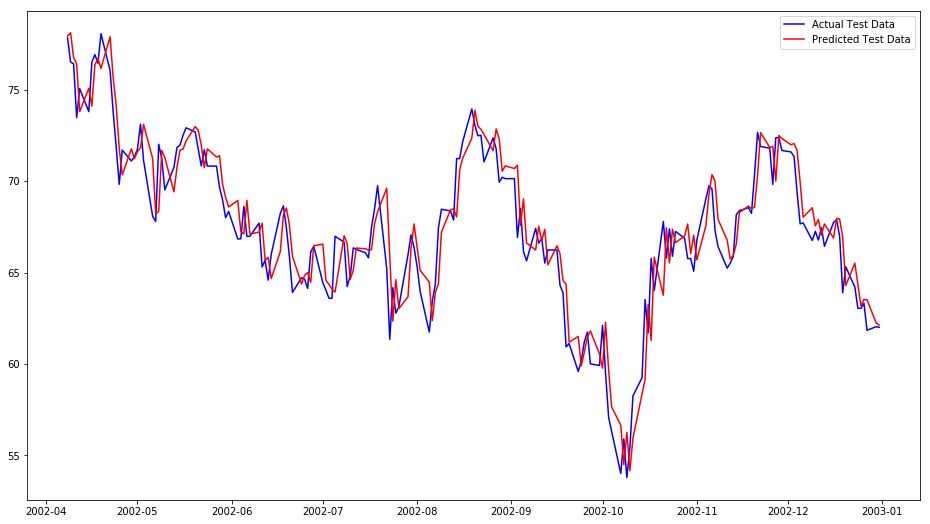

In [47]:

from statsmodels.tsa.ar_model import AR
model=AR(train_data)
model_fit=model.fit()
coef=model_fit.params
window=model_fit.k_ar
print("Lag: "+str(model_fit.k_ar))

history = train_data[len(train_data)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_data)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_data[t]                             #   Here i am confused why we are taking test_data point as observed value
                                                   #    We should use the yhat as new point in our data. If i use the predicted
                                                   #     yhat value ( in the next cell ), my prediction is invalid
    predictions.append(yhat)
    history.append(obs)
    




error=mse(test_data,predictions)
print("Root mean Squared error: "+str(np.math.sqrt(error)))


fig,ax=plt.subplots(figsize=(16,9))
#ax.plot(train_data,'green',label='Train Data')
ax.plot(test_data,'blue',label='Actual Test Data')
ax.plot(test_data.index,predictions,'red',label='Predicted Test Data')
ax.legend()
plt.show()

## Observations:-
**We obtained lag=20**<br>
**We are going to use this for rest of the notebook**<br>
**Mean squared error:- 1.6221**

In [48]:
import numpy as np

### Checking for stationarity of data

In [49]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(close)

Results of Dickey-Fuller Test:
Test Statistic                  -2.507697
p-value                          0.113613
#Lags Used                       1.000000
Number of Observations Used    954.000000
Critical Value (10%)            -2.568386
Critical Value (1%)             -3.437223
Critical Value (5%)             -2.864574
dtype: float64


### Here test statistic is similar to critical value. But according to procedure teststatistic>criticalvalue. So we accept the null hypothesis i.e the series is not stationary

### So i coverted it by seasonal differencing. Here 20 is lag value

**Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.**

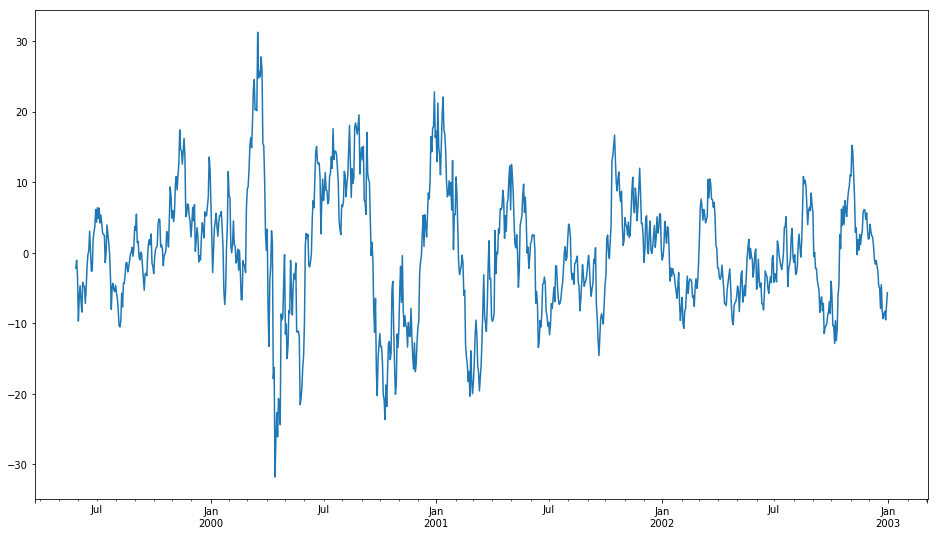

In [50]:
close_tmp=np.log(close)
tmp_data=close-close.shift(18)
plt.subplots(figsize=(16,9))
tmp_data=tmp_data.dropna()
tmp_data.dropna().plot()

<Figure size 1152x576 with 0 Axes>

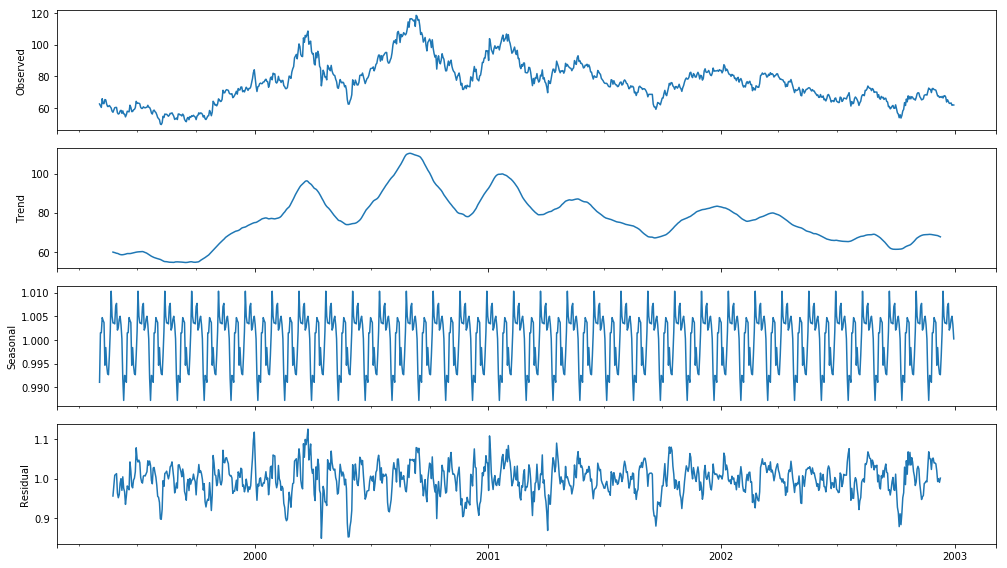

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = close
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

# Using ARIMA Model

MSE: 2.5211462275347216
MAE: 2.5211462275347216
RMSE: 1.5878117733329482
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  954
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2152.009
Method:                       css-mle   S.D. of innovations              2.309
Date:                Wed, 21 Aug 2019   AIC                           4310.018
Time:                        00:53:30   BIC                           4324.600
Sample:                             1   HQIC                          4315.572
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.070     -0.008      0.993      -0.138       0.137
ar.L1.D.y     -0.0675      0.032     -2.091      0.037    

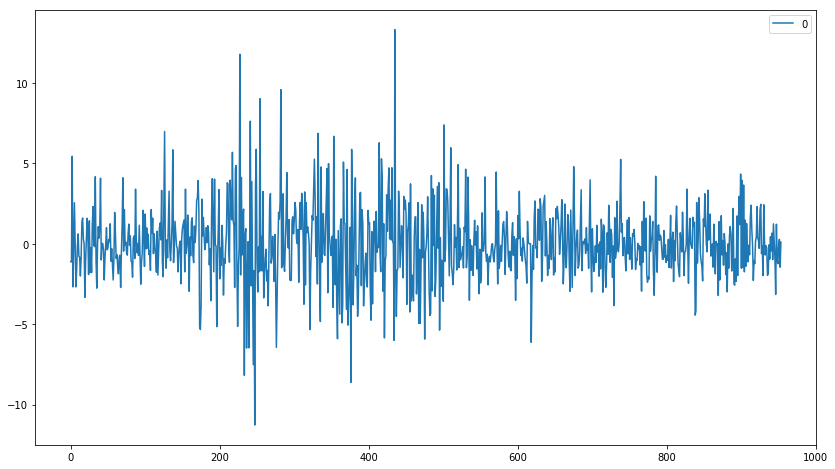

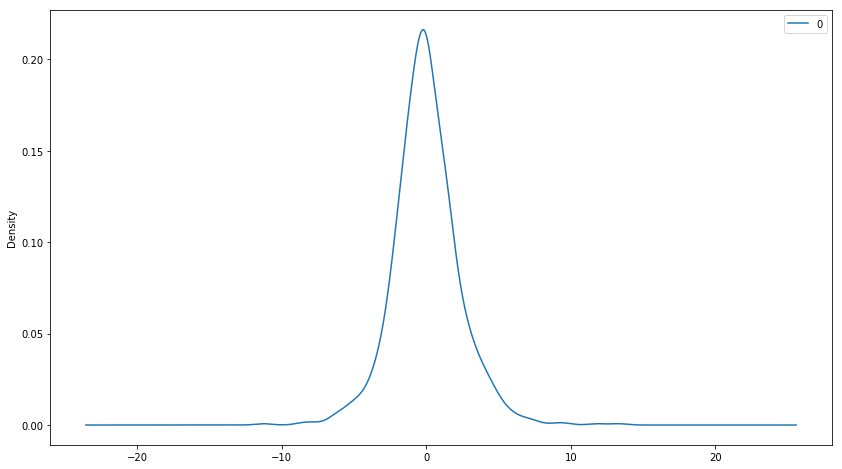

                0
count  954.000000
mean    -0.000079
std      2.310256
min    -11.271301
25%     -1.307000
50%     -0.092640
75%      1.222432
max     13.309741


In [56]:
from statsmodels.tsa.arima_model import ARIMA
train_arima = train_data
test_arima = test_data

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
# report performance
msea = mse(y, predictions)
print('MSE: '+str(msea))
mae = mse(y, predictions)
print('MAE: '+str(mae))
rmse = np.math.sqrt(mse(y, predictions))
print('RMSE: '+str(rmse))
#model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

From the distribution of residual errors we can observe that mean is centered very closely to 0

**1- line plot of the residual errors**<br>
**2-density plot of the residual error values**<br>

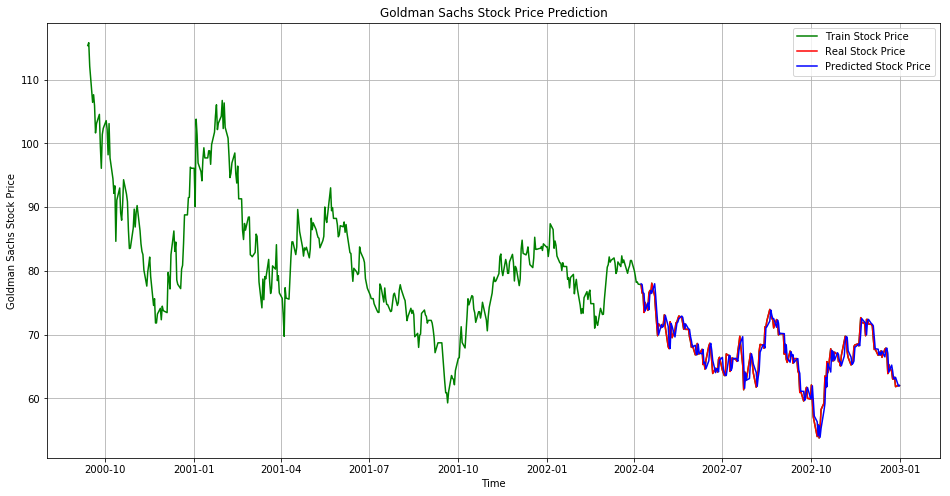

In [57]:
plt.figure(figsize=(16,8))
plt.plot(close.index[-600:], close.tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Goldman Sachs Stock Price')
plt.legend()
plt.grid(True)
#plt.savefig('arima_model.pdf')
plt.show()

# Using Machine Learning models

## [1] Linear Regression

### Dataset Creation

In [68]:
file='gs.us.txt'

dateparse=lambda date:pd.datetime.strptime(date,'%Y-%m-%d')
data=pd.read_csv(file,sep=',',parse_dates=[0])
data=data[['Date','Close']]
data.head(5)

,Date,Close
0,1999-05-04,62.659
1,1999-05-05,61.547
2,1999-05-06,60.488
3,1999-05-07,65.998
4,1999-05-10,62.941


In [133]:
def is_weekend(date):
    x=[]
    for d in date:
        if d==0 or d==4:
            x.append(1)
        else:
            x.append(0)
    return x
    
def create_features(df):
    df['DayOfWeek']=df['Date'].dt.dayofweek
    df['quarter']=df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    df['is_weekend']=is_weekend(df['DayOfWeek'])
    df=df[['DayOfWeek','quarter','month','year','dayofyear','dayofmonth','weekofyear','is_weekend']]
    return df


In [134]:
final_data=create_features(data)
final_data.head(5)

,DayOfWeek,quarter,dayofyear,dayofmonth,weekofyear,is_weekend
0,1,2,124,4,18,0
1,2,2,125,5,18,0
2,3,2,126,6,18,0
3,4,2,127,7,18,1
4,0,2,130,10,19,1


In [135]:
x_train,x_test=final_data[:int(0.8*len(final_data))],final_data[int(0.8*len(final_data)):]
y_train,y_test=data['Close'][:int(0.8*len(final_data))],data['Close'][int(0.8*len(final_data)):]

In [136]:
x_train.shape

(3728, 6)

In [137]:
x_test.shape

(933, 6)

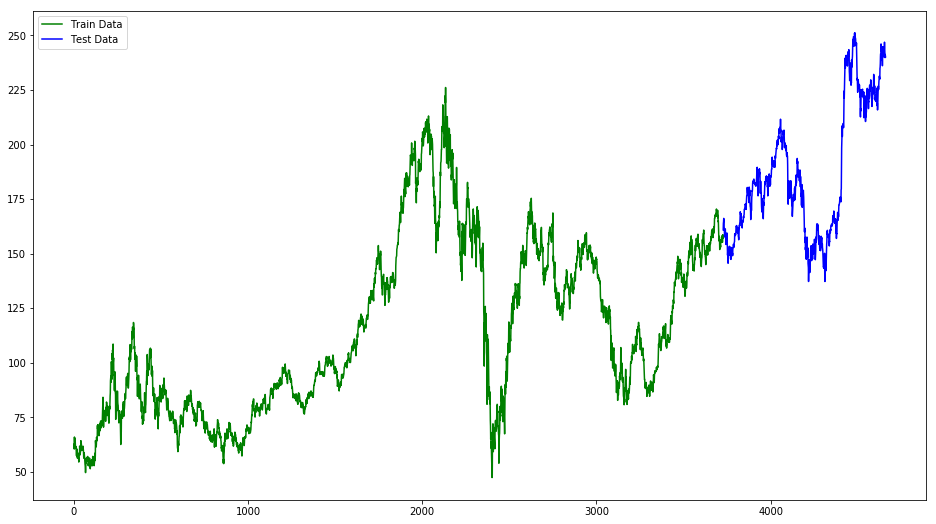

In [138]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(y_train,'green',label='Train Data')
ax.plot(y_test,'blue',label='Test Data')
ax.legend()


In [139]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [140]:
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

78.98136407822737

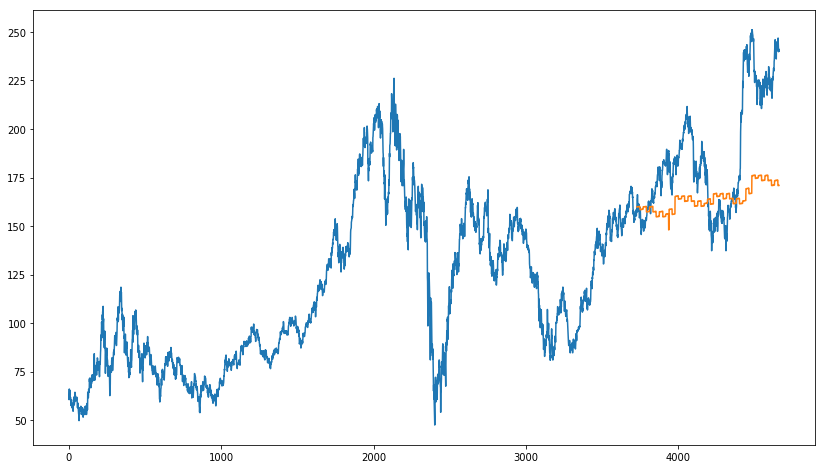

In [110]:
prediction=pd.DataFrame()
prediction['pred']=preds
prediction['y']=y_test
prediction.index=data[3728:].index
plt.plot(data['Close'])
plt.plot(prediction['pred'])

In [111]:
import xgboost as xgb

In [127]:
estm=[10,50,70,100,250,500,750,1000,1500,2000]
error=[]
for est in estm:
    reg = xgb.XGBRegressor(n_estimators=est)
    reg.fit(x_train, y_train)
    preds = reg.predict(x_test)
    rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
    error.append(rms)
best_estimator=estm[error.index(min(error))]
print("Best Estimator is:    ",best_estimator)


Best Estimator is:     250


In [128]:
reg = xgb.XGBRegressor(n_estimators=best_estimator)
reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [129]:
from xgboost import plot_importance, plot_tree

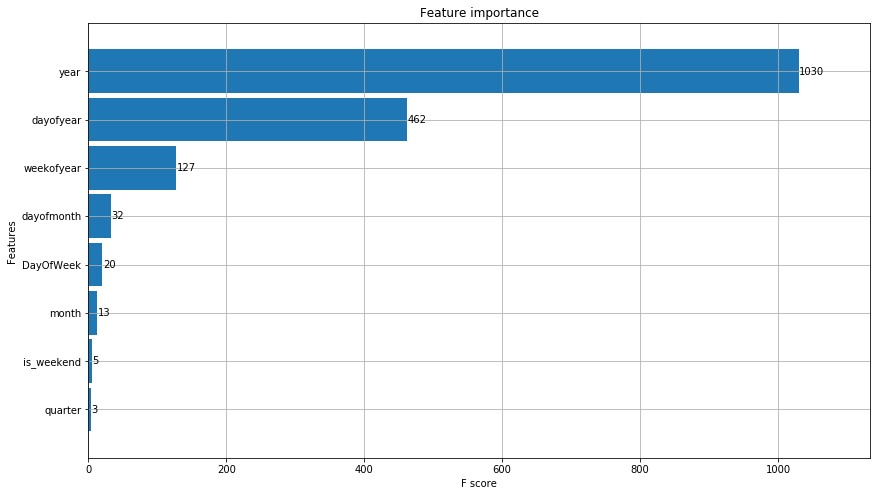

In [130]:
_ = plot_importance(reg, height=0.9)

In [131]:
preds = reg.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

40.77809694379103

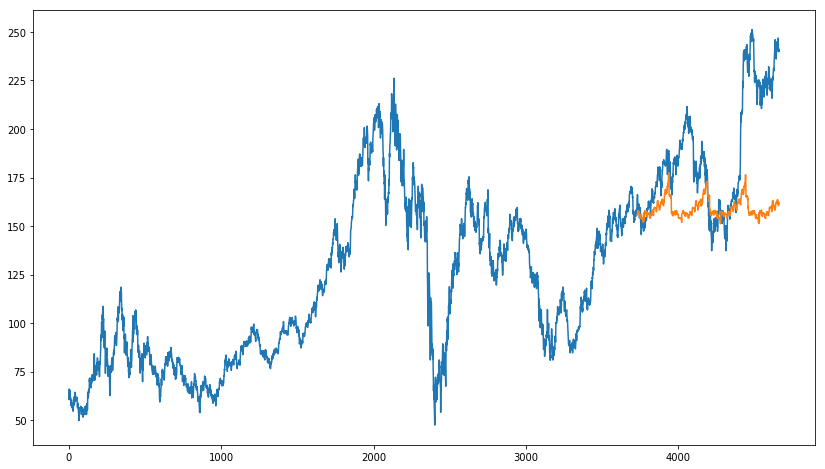

In [132]:
prediction=pd.DataFrame()
prediction['pred']=preds
prediction['y']=y_test
prediction.index=data[3728:].index
plt.plot(data['Close'])
plt.plot(prediction['pred'])

# Using deep learning Technique(LSTM) 

In [153]:
new_data[:5]

,Open,High,Low,Close,Volume,OpenInt
1999-05-04,67.665,68.780,62.329,62.659,24472946.0,0.0
1999-05-05,62.213,62.213,58.991,61.547,8295140.0,0.0
1999-05-06,60.542,61.773,59.712,60.488,3185852.0,0.0
1999-05-07,60.488,66.671,59.429,65.998,5331091.0,0.0
1999-05-10,65.331,65.441,62.549,62.941,2839054.0,0.0


In [154]:
from sklearn.preprocessing import MinMaxScaler

## Splitting into Train-test

In [155]:
new_data1=new_data.iloc[:,0:5]
train_lstm1,test_lstm1=new_data1[:int(0.8*len(new_data1))],new_data1[int(0.8*len(new_data1)):]

## Normalizing Data

In [156]:
scaler=MinMaxScaler()
train_lstm=scaler.fit_transform(train_lstm1)
test_lstm=scaler.transform(test_lstm1)

## Preparing data for LSTM input

In [157]:
time_step=18
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for i in range(time_step,len(train_lstm)):
    x_train.append(train_lstm[i-time_step:i])
    y_train.append(train_lstm[i,3])
for i in range(time_step,len(test_lstm)):
    x_test.append(test_lstm[i-time_step:i])
    y_test.append(test_lstm[i,3])
x_train,y_train,x_test,y_test=np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)
print(x_train.shape)
print(y_train.shape)

(746, 18, 5)
(746,)


In [158]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [176]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(18 ,5),  kernel_initializer='glorot_normal'))
lstm_model.add(Dropout(0.5))


lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100)               42400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 44,441
Trainable params: 44,441
Non-trainable params: 0
_________________________________________________________________


In [177]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train, y_train, epochs = 50, batch_size = 32,
              validation_data=(x_test, y_test))

Train on 746 samples, validate on 174 samples
Epoch 1/50
746/746 [==============================] - 3s 4ms/step - loss: 0.0390 - val_loss: 0.0172
Epoch 2/50
746/746 [==============================] - 1s 2ms/step - loss: 0.0153 - val_loss: 0.0034
Epoch 3/50
746/746 [==============================] - 1s 2ms/step - loss: 0.0081 - val_loss: 0.0042
Epoch 4/50
746/746 [==============================] - 1s 2ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 5/50
746/746 [==============================] - 1s 2ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 6/50
746/746 [==============================] - 1s 2ms/step - loss: 0.0053 - val_loss: 0.0019
Epoch 7/50
746/746 [==============================] - 1s 2ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 8/50
746/746 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 9/50
746/746 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 10/50
746/746 [==============================] -

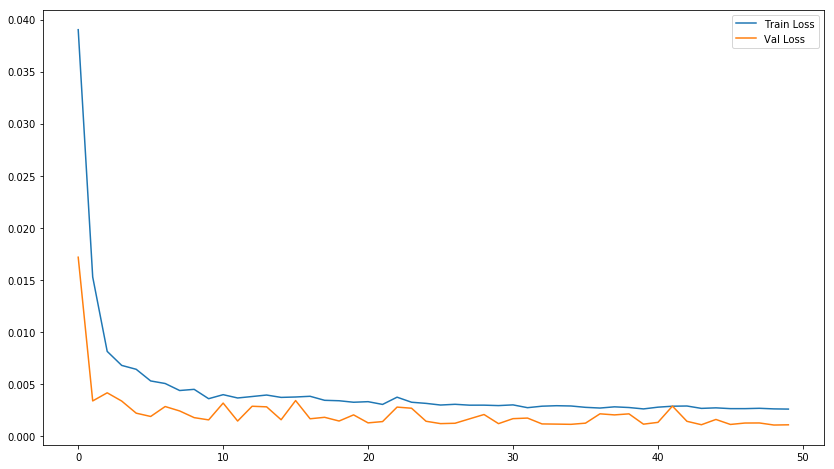

In [178]:
plt.plot(lstm_model.history.history['loss'],label='Train Loss')
plt.plot(lstm_model.history.history['val_loss'],label='Val Loss')
plt.legend()

**Here we can observe that loss decreases gradually and its much better than normal statistical model**

## Preparing data for test prediction

In [179]:
combine = pd.concat((train_lstm1, test_lstm1), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_lstm1) - 18:].values
test_inputs = test_inputs.reshape(-1,5)
test_inputs = scaler.transform(test_inputs)

In [180]:
X_test = []
for i in range(18, test_lstm1.shape[0]+18):
    X_test.append(test_inputs[i-18:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
predicted_stock_price = lstm_model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = (predicted_stock_price * scaler.data_range_[3]) + scaler.data_min_[3]

In [186]:
rms=np.sqrt(np.mean(np.power((np.array(test_lstm1.iloc[:,3])-np.array(predicted_stock_price)),2)))
print("Root means square error:    ",rms)

Root means square error:     6.050000459962937


In [181]:
test_lstm1.shape

(192, 5)

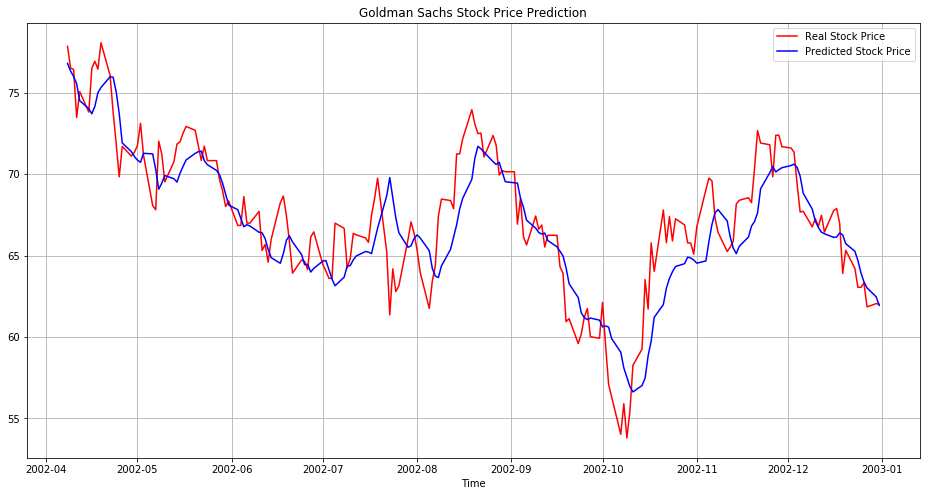

In [182]:
plt.figure(figsize=(16,8))
#plt.plot(train_lstm1.iloc[:,3], color='green', label = 'Train Stock Price')
plt.plot(test_lstm1.iloc[:,3] ,color = 'red', label = 'Real Stock Price')
plt.plot(test_lstm1.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('Time')

plt.legend()
plt.grid(True)
#plt.savefig('arima_model.pdf')
plt.show()